In [210]:
from excel_extract import ProcesadorArchivosExcel
from copy import deepcopy
import pandas as pd
from datetime import datetime

In [203]:
process=ProcesadorArchivosExcel()
dict_titles={"WOW": "Article Title", "ACM": "Title", "DBLP": "Title"}
for element in ["WOW","DBLP","ACM"]:
    process.cargar_archivos(carpeta="/home/d4k/Documents/guillermo/doctorado/systematic review/ouput_excel",prefijo=element)
    process.multiple_df_append(deepcopy(process.df))
process.multiple_df_concat()
df_sin_duplicados = process.df.drop_duplicates(subset='title', keep='first')


In [144]:
df_sin_duplicados.columns

Index(['Authors', 'Researcher Ids', 'ORCIDs', 'title', 'Volume', 'Issue',
       'DOI', 'Document Type', 'Publication Date', 'ISSN', 'eISSN', 'ISBN',
       'Pages', 'Publisher', 'Proceedings title', 'Keywords'],
      dtype='object')

In [207]:
len(df_sin_duplicados.columns)

17

In [206]:
df_sin_duplicados

,Authors,Researcher Ids,ORCIDs,title,Volume,Issue,DOI,Document Type,Publication Date,Abstract,ISSN,eISSN,ISBN,Pages,Publisher,Proceedings title,Keywords
0,"Xenos, Alexandros; Pavlopoulos, John; Androuts...","Pavlopoulos, John/GPP-2913-2022","Pavlopoulos, John/0000-0001-9188-7425; Androut...",Context Sensitivity Estimation in Toxicity Det...,NaN,NaN,,Proceedings Paper,2021,User posts whose perceived toxicity depends on...,NaN,NaN,978-1-954085-59-6,140-145,,nan 5th Workshop on Structured Prediction for ...,NaN
1,"Hemmerich, Jennifer; Asilar, Ece; Ecker, Gerha...","ASILAR, Ece/ABC-4577-2020","ASILAR, Ece/0000-0001-5680-599X; Hemmerich, Je...",COVER: conformational oversampling as data aug...,12.0,1,10.1186/s13321-020-00420-z,Article,2020,Training neural networks with small and imbala...,1758-2946,NaN,NaN,,,nan nan,NaN
2,"Ghosh, Sreyan; Lepcha, Samden; Sakshi, S.; Sha...",NaN,NaN,DeToxy: A Large-Scale Multimodal Dataset for T...,NaN,NaN,10.21437/Interspeech.2022-10752,Proceedings Paper,2022,Toxic speech is regarded as one of the crucial...,2308-457X,NaN,*****************,5185-5189,,nan Interspeech ConferenceInterspeech Conference,NaN
3,"Brassard-Gourdeau, Eloi; Khoury, Richard",NaN,NaN,Subversive Toxicity Detection using Sentiment ...,NaN,NaN,,Proceedings Paper,2019,The presence of toxic content has become a maj...,NaN,NaN,978-1-950737-43-7,1-10,,nan 3rd Workshop on Abusive Language Online3rd...,NaN
4,"Fortuna, Paula; Soler-Company, Juan; Wanner, Leo",NaN,NaN,"Toxic, Hateful, Offensive or Abusive? What Are...",NaN,NaN,,Proceedings Paper,2020,The field of the automatic detection of hate s...,NaN,NaN,979-10-95546-34-4,6786-6794,,nan 12th International Conference on Language ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,"Bertaglia T,Bartekova K,Jongma R,Mccarthy S,Ia...",NaN,NaN,Sexism in Focus: An Annotated Dataset of YouTu...,NaN,NaN,10.1145/3599696.3612900,Conference Paper,2023,This paper presents a novel dataset of 200k Yo...,NaN,NaN,NaN,,Association for Computing Machinery,Proceedings of the 3rd International Workshop ...,NaN
577,"Govers J,Feldman P,Dant A,Patros P",NaN,NaN,Prompt-GAN–Customisable Hate Speech and Extrem...,NaN,NaN,10.1145/3594315.3594366,Conference Paper,2023,Online hate speech and violent extremism knows...,NaN,NaN,9781450399029.0,,Association for Computing Machinery,Proceedings of the 2023 9th International Conf...,"datasets, social media, hate speech, artificia..."
578,"Chen B,Paliwal A,Yan Q",NaN,NaN,Jailbreaker in Jail: Moving Target Defense for...,NaN,NaN,10.1145/3605760.3623764,Conference Paper,2023,"Large language models (LLMs), known for their ...",NaN,NaN,NaN,,Association for Computing Machinery,Proceedings of the 10th ACM Workshop on Moving...,"trustworthy machine learning, dialogue system,..."
579,"Gadiraju V,Kane S,Dev S,Taylor A,Wang D,Denton...",NaN,NaN,I Wouldn’t Say Offensive but...: Disability-Ce...,NaN,NaN,10.1145/3593013.3593989,Conference Paper,2023,Large language models (LLMs) trained on real-w...,NaN,NaN,NaN,,Association for Computing Machinery,Proceedings of the 2023 ACM Conference on Fair...,"large language models, data annotation, artifi..."


In [209]:
len(df_sin_duplicados['Abstract'].unique())

456

In [58]:
df_sin_duplicados['Publisher'].unique()

array([nan, 'Springer', 'Association for Computational Linguistics',
       'CEUR-WS.org', 'SCITEPRESS', 'ACM', 'INCOMA Ltd.', 'AAAI Press',
       'IEEE', 'ScholarSpace', 'ACM / IW3C2',
       'Alliance of Digital Humanities Organizations (ADHO)',
       'Association for Computing Machinery', 'IEEE Press'], dtype=object)

In [204]:
df_sin_duplicados=df_sin_duplicados.drop(columns=[ 'Abstract - Foreign','Abstract - English Transliteration','Abstract - Foreign.1','Abstract - Korean','Article Title - SciELO','Article Title - SciELO.1', 'Article Title - Chinese','Article Title - Russian','Book Authors', 'Group Authors','Cited References', 'Language', 'Advisor','Committee Member', 'Copyright', 'Degree Name', 'No of References', 'Cited References','Since 2013 Usage Count','180 Day Usage Count',
       'Conference Date','Supplement',"Early Access Date","License URI",'License Name','Article Number','Version','Version History','Meeting Abstract','Special Issue','Book Series Title','Book Series Subtitle','Publication Type',"Conference location",'Author - Arabic','Source Title','Source Title - Korean','Patent Number','Patent Assignee','Source Title - Arabic','Publication Year','Institution Address', 'Institution','Dissertation and Thesis Subjects','Author Keywords','Conference Sponsor','Conference Location',
       'UT (Unique ID)', 'Pubmed Id', 'Unnamed: 75','Book Group Authors','Book Editors','License Description','Eprint ID',"URLs",
       'Indexed Date','Editors','Times Cited, WoS Core', 'Times Cited, CSCD', 'Times Cited, RSCI',
       'Times Cited, ARCI', 'Times Cited, BCI', 'Times Cited, SCIELO',
       'Times Cited, All Databases','Publication year','Series',
       'Address'])

In [205]:
df_sin_duplicados['Pages'] = df_sin_duplicados.apply(
    lambda row: f"{row['Start Page']}-{row['End Page']}" if pd.notna(row['Start Page']) and pd.notna(row['End Page']) else '',
    axis=1
)

# Eliminar las columnas 'Start Page' y 'End Page'
df_sin_duplicados.drop(['Start Page', 'End Page'], axis=1, inplace=True)
df_sin_duplicados['Publisher'] = df_sin_duplicados['Publisher'].fillna('')
df_sin_duplicados['Journal'] = df_sin_duplicados['Journal'].fillna('')
df_sin_duplicados['Publisher'] = df_sin_duplicados['Publisher'].fillna('') + ' ' + df_sin_duplicados['Journal'].fillna('')
df_sin_duplicados.drop(['Journal'], axis=1, inplace=True)

# Concatenar 'DOI' y 'Book DOI'
df_sin_duplicados['DOI'] = df_sin_duplicados['DOI'].fillna('') + ' ' + df_sin_duplicados['Book DOI'].fillna('')
df_sin_duplicados.drop(['Book DOI'], axis=1, inplace=True)
df_sin_duplicados['Document Type'] = df_sin_duplicados['Document Type'].fillna('') + ' ' + df_sin_duplicados['Item type'].fillna('')
df_sin_duplicados.drop(['Item type'], axis=1, inplace=True)
df_sin_duplicados['Publication Date'] = df_sin_duplicados['Publication Date'].fillna('')
df_sin_duplicados['Date published'] = df_sin_duplicados['Date published'].fillna('')
df_sin_duplicados['Publication Date'] = df_sin_duplicados.apply(
    lambda row: f"{row['Publication Date']}{row['Date published']}" if pd.notna(row['Publication Date']) or pd.notna(row['Date published']) else '',
    axis=1
)
df_sin_duplicados['Publication Date'] = df_sin_duplicados['Publication Date'].str.extract(r'(\d{4})', expand=False)
# Eliminar la columna 'Date published'
df_sin_duplicados.drop(['Date published'], axis=1, inplace=True)
df_sin_duplicados['Proceedings title'] = df_sin_duplicados['Proceedings title'].astype(str).fillna('') + ' ' + df_sin_duplicados['Conference Title'].astype(str).fillna('')
df_sin_duplicados.drop(['Conference Title'], axis=1, inplace=True)

In [211]:
import pandas as pd

In [212]:
result=pd.read_excel("/home/d4k/Documents/guillermo/doctorado/systematic review/ouput_excel/result_WOW_ACM_DBLP.xlsx")

In [217]:
result.columns


Index(['Authors', 'Researcher Ids', 'ORCIDs', 'title', 'Volume', 'Issue',
       'DOI', 'Document Type', 'Publication Date', 'Abstract', 'ISSN', 'eISSN',
       'ISBN', 'Pages', 'Publisher', 'Proceedings title', 'Keywords'],
      dtype='object')

In [214]:
example= pd.read_csv("/home/d4k/Documents/guillermo/doctorado/systematic review/input_execl/IEEE_mitigate_toxicity.csv")

In [215]:
example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          23 non-null     object 
 1   Authors                 23 non-null     object 
 2   Author Affiliations     23 non-null     object 
 3   Publication Title       23 non-null     object 
 4   Date Added To Xplore    23 non-null     object 
 5   Publication Year        23 non-null     int64  
 6   Volume                  4 non-null      float64
 7   Issue                   2 non-null      float64
 8   Start Page              23 non-null     int64  
 9   End Page                23 non-null     object 
 10  Abstract                23 non-null     object 
 11  ISSN                    9 non-null      object 
 12  ISBNs                   21 non-null     object 
 13  DOI                     21 non-null     object 
 14  Funding Information     3 non-null      obje

In [ ]:
columns=[ 'Abstract - Foreign','Abstract - English Transliteration','Abstract - Foreign.1','Abstract - Korean','Article Title - SciELO','Article Title - SciELO.1', 'Article Title - Chinese','Article Title - Russian','Book Authors', 'Group Authors','Cited References', 'Language', 'Advisor','Committee Member', 'Copyright', 'Degree Name', 'No of References', 'Cited References','Since 2013 Usage Count','180 Day Usage Count',
       'Conference Date','Supplement',"Early Access Date","License URI",'License Name','Article Number','Version','Version History','Meeting Abstract','Special Issue','Book Series Title','Book Series Subtitle','Publication Type',"Conference location",'Author - Arabic','Source Title','Source Title - Korean','Patent Number','Patent Assignee','Source Title - Arabic','Publication Year','Institution Address', 'Institution','Dissertation and Thesis Subjects','Author Keywords','Conference Sponsor','Conference Location',
       'UT (Unique ID)', 'Pubmed Id', 'Unnamed: 75','Book Group Authors','Book Editors','License Description','Eprint ID',"URLs",
       'Indexed Date','Editors','Times Cited, WoS Core', 'Times Cited, CSCD', 'Times Cited, RSCI',
       'Times Cited, ARCI', 'Times Cited, BCI', 'Times Cited, SCIELO',
       'Times Cited, All Databases','Publication year','Series',
       'Address','Author Affiliations','Publication Title','Date Added To Xplore','Date Added To Xplore','Volume','Issue',
       'Funding Information','PDF Link','Author Keywords','Mesh_Terms','Article Citation Count','Patent Citation Count',
       'Reference Count','License','Online Date','Issue Date','Meeting Date','Publisher'])

In [ ]:
ISBNs-ISBN
IEEE Terms - Keywords
Document Identifier - Document Type

In [20]:
base_data= pd.read_excel("/home/d4k/Documents/guillermo/doctorado/systematic_review/data/ouput_excel/result_WOW_ACM_DBLP_IEEE.xlsx")

In [59]:
previous_base_data= pd.read_excel("/home/d4k/Documents/guillermo/doctorado/systematic review/ouput_excel/result_WOW_ACM_DBLP.xlsx")

In [60]:
annotation_data=pd.read_csv("/home/d4k/Documents/guillermo/doctorado/systematic review/ouput_excel/admin.csv")

In [21]:
previous_base_data_abstract= pd.read_excel("/home/d4k/Documents/guillermo/doctorado/systematic_review/data/ouput_excel/result_WOW_ACM_DBLP_IEEE_annotation_final.xlsx")

In [63]:
len(previous_base_data_abstract)

543

In [25]:
rows_with_blank_abstracts = base_data[base_data["Abstract"].isnull() | (base_data["Abstract"] == '')]

In [26]:
len(rows_with_blank_abstracts)

81

In [24]:
for index,row in rows_with_blank_abstracts.iterrows():
  indices = previous_base_data_abstract.index[previous_base_data_abstract['title'] == row["title"]]
  # print(previous_base_data_abstract.loc[indices[0]]["Abstract"])
  if len(indices)>0:
    base_data.at[index, "Abstract"] = previous_base_data_abstract.loc[indices[0]]["Abstract"]

  # print(prueba_1.loc[]["Abstract"])

In [27]:
base_data.to_excel("/home/d4k/Documents/guillermo/doctorado/systematic_review/data/ouput_excel/result_WOW_ACM_DBLP_IEEE_final_.xlsx",index=False)

In [ ]:
rows_with_blank_abstracts = prueba[prueba["Abstract"].isnull() | (prueba["Abstract"] == '')]

In [79]:
annotation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1281 non-null   int64  
 1   text               1281 non-null   object 
 2   Authors            1281 non-null   object 
 3   Researcher Ids     279 non-null    object 
 4   ORCIDs             338 non-null    object 
 5   title              1281 non-null   object 
 6   Volume             499 non-null    object 
 7   Issue              294 non-null    object 
 8   DOI                1281 non-null   object 
 9   Document Type      1281 non-null   object 
 10  Publication Date   703 non-null    float64
 11  Abstract           1281 non-null   object 
 12  ISSN               594 non-null    object 
 13  eISSN              266 non-null    object 
 14  ISBN               730 non-null    object 
 15  Pages              865 non-null    object 
 16  Publisher          1281 

In [28]:
prueba=pd.read_excel("/home/d4k/Documents/guillermo/doctorado/systematic_review/data/ouput_excel/result_WOW_ACM_DBLP_IEEE_final_.xlsx")

In [30]:
annotation_data=pd.read_csv("/home/d4k/Documents/guillermo/doctorado/systematic_review/data/ouput_excel/result_WOW_ACM_DBLP_IEEE_annotation_final.xlsx",encoding='unicode_escape')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 11: invalid start byte

In [89]:
prueba['text'] = "Title:"+prueba['title'] + '\n\n ' + prueba['Abstract']

In [90]:
prueba["label"]=""

In [118]:
for index,row in prueba.iterrows():
    indices = annotation_data.index[annotation_data['title'] == row["title"]]
    # print(previous_base_data_abstract.loc[indices[0]]["Abstract"])
    if len(indices)>0:
        prueba.at[index, "label"] = annotation_data.loc[indices[0]]["label"]

In [131]:
prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Authors            1316 non-null   object
 1   Researcher Ids     279 non-null    object
 2   ORCIDs             338 non-null    object
 3   title              1316 non-null   object
 4   Volume             397 non-null    object
 5   Issue              241 non-null    object
 6   DOI                1316 non-null   object
 7   Document Type      1316 non-null   object
 8   Publication Date   1316 non-null   int64 
 9   Abstract           1316 non-null   object
 10  ISSN               355 non-null    object
 11  eISSN              266 non-null    object
 12  ISBN               250 non-null    object
 13  Pages              307 non-null    object
 14  Publisher          1316 non-null   object
 15  Proceedings title  1316 non-null   object
 16  Keywords           99 non-null     object


In [132]:
prueba.to_excel("/home/d4k/Documents/guillermo/doctorado/systematic review/ouput_excel/result_WOW_ACM_DBLP_IEEE_annotation_final.xlsx",index=False)

In [129]:
labels={"out_of_scope":0,"out_but_toxicity":1,"detox":2,"detection":3,"Gen_dataset":4,"survey":5,"methodology":6,"evaluation":7,"Use_dataset":8}

In [130]:
for label in list(labels.keys()):
    prueba[label] = prueba['label'].apply(lambda x: 1 if label in x.split('#') else 0)


In [16]:
count_both_ones = sum((prueba[['out_of_scope', 'out_but_toxicity']] == 1).any(axis=1))


In [138]:
count_both_ones

950

In [17]:
print(f"Percentage of no valid_documents:{count_both_ones/len(prueba)*100}, Counts of valid documents:{len(prueba)-count_both_ones}")

Percentage of no valid_documents:72.29571984435798, Counts of valid documents:356


In [2]:
import pandas as pd

In [5]:
prueba = pd.read_excel("/home/d4k/Documents/guillermo/doctorado/systematic_review/data/ouput_excel/result_WOW_ACM_DBLP_IEEE_annotation_final.xlsx")

In [7]:
prueba['title_'] = prueba['title'].str.lower()
prueba.drop_duplicates(subset='title_', keep='first', inplace=True)


In [9]:
prueba.reset_index(drop=True, inplace=True)

In [11]:
prueba.drop(['title_'], axis=1, inplace=True)

In [12]:
prueba

,Authors,Researcher Ids,ORCIDs,title,Volume,Issue,DOI,Document Type,Publication Date,Abstract,...,label,out_of_scope,out_but_toxicity,detox,detection,Gen_dataset,survey,methodology,evaluation,Use_dataset
0,"Xenos, Alexandros; Pavlopoulos, John; Androuts...","Pavlopoulos, John/GPP-2913-2022","Pavlopoulos, John/0000-0001-9188-7425; Androut...",Context Sensitivity Estimation in Toxicity Det...,NaN,NaN,,Proceedings Paper,2021,User posts whose perceived toxicity depends on...,...,Gen_dataset#detection#evaluation#methodology,0,0,0,1,1,0,1,1,0
1,"Hemmerich, Jennifer; Asilar, Ece; Ecker, Gerha...","ASILAR, Ece/ABC-4577-2020","ASILAR, Ece/0000-0001-5680-599X; Hemmerich, Je...",COVER: conformational oversampling as data aug...,12,1,10.1186/s13321-020-00420-z,Article,2020,Training neural networks with small and imbala...,...,out_of_scope,1,0,0,0,0,0,0,0,0
2,"Ghosh, Sreyan; Lepcha, Samden; Sakshi, S.; Sha...",NaN,NaN,DeToxy: A Large-Scale Multimodal Dataset for T...,NaN,NaN,10.21437/Interspeech.2022-10752,Proceedings Paper,2022,Toxic speech is regarded as one of the crucial...,...,Gen_dataset#detox#out_but_toxicity,0,1,1,0,1,0,0,0,0
3,"Brassard-Gourdeau, Eloi; Khoury, Richard",NaN,NaN,Subversive Toxicity Detection using Sentiment ...,NaN,NaN,,Proceedings Paper,2019,The presence of toxic content has become a maj...,...,Use_dataset#detection#methodology,0,0,0,1,0,0,1,0,1
4,"Fortuna, Paula; Soler-Company, Juan; Wanner, Leo",NaN,NaN,"Toxic, Hateful, Offensive or Abusive? What Are...",NaN,NaN,,Proceedings Paper,2020,The field of the automatic detection of hate s...,...,Use_dataset#detection#evaluation,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,"Lin, Ching-Chih, Chung, Mei-Hwa, Wang, Zen",NaN,NaN,The Study of Designing for Environment on Liqu...,NaN,NaN,10.1109/ECODIM.2005.1619283,,2005,The Flat Panel Display Industry in Taiwan rece...,...,out_of_scope,1,0,0,0,0,0,0,0,0
1281,"Chakrabarty, Krishnendu, Bhattacharya, Bhargab...",NaN,NaN,Design automation for biochemistry synthesis o...,NaN,NaN,10.1109/ICCAD.2014.7001364,,2014,Microfluidic biochips are recently being advoc...,...,out_of_scope,1,0,0,0,0,0,0,0,0
1282,"Moncada, Sebastian Villegas, Palacio, Mauricio...",NaN,NaN,A software-based predictive model for greenhou...,NaN,NaN,10.23919/CISTI.2018.8399195,,2018,In the last years research-based programs rele...,...,out_of_scope,1,0,0,0,0,0,0,0,0
1283,"Giordano, Giulia, Rantzer, Anders, Jonsson, Va...",NaN,NaN,A convex optimization approach to cancer treat...,NaN,NaN,10.1109/CDC.2016.7798636,,2016,The clinical success of targeted cancer therap...,...,out_of_scope,1,0,0,0,0,0,0,0,0


In [18]:
prueba.to_excel("/home/d4k/Documents/guillermo/doctorado/systematic_review/data/ouput_excel/result_WOW_ACM_DBLP_IEEE_annotation_final.xlsx",index=False)

In [14]:
subset_cumple_condicion = prueba[(prueba[['out_of_scope', 'out_but_toxicity']] == 1).any(axis=1)].reset_index(drop=True)
subset_no_cumple_condicion = prueba[~(prueba[['out_of_scope', 'out_but_toxicity']] == 1).any(axis=1)].reset_index(drop=True)
subset_cumple_condicion.to_excel("/home/d4k/Documents/guillermo/doctorado/systematic_review/data/ouput_excel/result_WOW_ACM_DBLP_IEEE_annotation_final_out.xlsx",index=False)
subset_no_cumple_condicion.to_excel("/home/d4k/Documents/guillermo/doctorado/systematic_review/data/ouput_excel/result_WOW_ACM_DBLP_IEEE_annotation_final_in.xlsx",index=False)

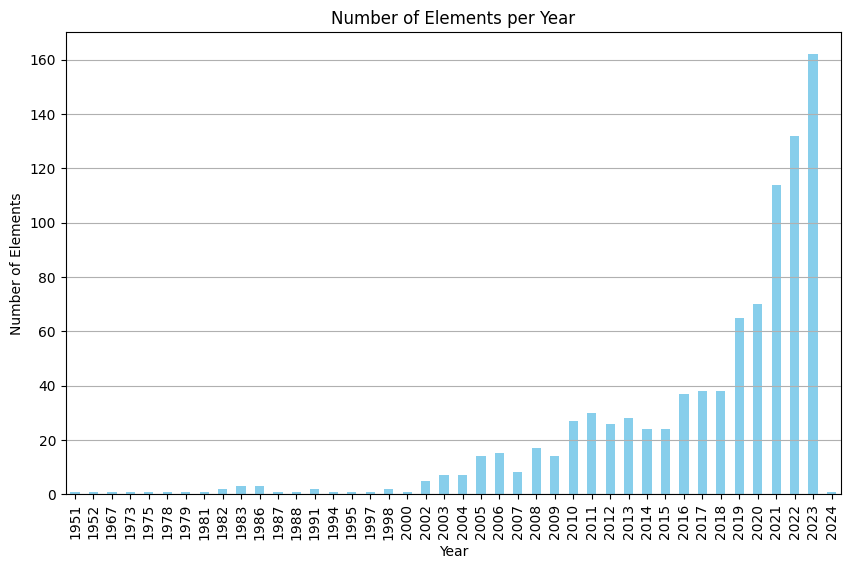

In [15]:
import matplotlib.pyplot as plt
elements_per_year = subset_cumple_condicion.groupby('Publication Date').size()

# Plotting the chart
plt.figure(figsize=(10, 6))
elements_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Elements per Year')
plt.xlabel('Year')
plt.ylabel('Number of Elements')
plt.grid(axis='y')
plt.show()

In [127]:
list(labels.keys())

['out_of_scope',
 'out_but_toxicity',
 'detox',
 'detection',
 'Gen_dataset',
 'survey',
 'methodology',
 'evaluation',
 'Use_dataset']

In [121]:
prueba.label

0       Gen_dataset#detection#evaluation#methodology
1                                       out_of_scope
2                 Gen_dataset#detox#out_but_toxicity
3                  Use_dataset#detection#methodology
4                   Use_dataset#detection#evaluation
                            ...                     
1311                                    out_of_scope
1312                                    out_of_scope
1313                                    out_of_scope
1314                                    out_of_scope
1315                                    out_of_scope
Name: label, Length: 1316, dtype: object

In [112]:
subset_df = prueba[prueba['label'].isna()]

In [113]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 772 to 1219
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Authors            36 non-null     object
 1   Researcher Ids     0 non-null      object
 2   ORCIDs             0 non-null      object
 3   title              36 non-null     object
 4   Volume             0 non-null      object
 5   Issue              0 non-null      object
 6   DOI                36 non-null     object
 7   Document Type      36 non-null     object
 8   Publication Date   36 non-null     int64 
 9   Abstract           36 non-null     object
 10  ISSN               0 non-null      object
 11  eISSN              0 non-null      object
 12  ISBN               0 non-null      object
 13  Pages              0 non-null      object
 14  Publisher          36 non-null     object
 15  Proceedings title  36 non-null     object
 16  Keywords           0 non-null      object


In [115]:
subset_df.to_csv("/home/d4k/Documents/guillermo/doctorado/systematic review/ouput_excel/result_WOW_ACM_DBLP_IEEE_annotation.csv", index=False)

In [233]:
prueba.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Authors            1281 non-null   object 
 1   Researcher Ids     279 non-null    object 
 2   ORCIDs             338 non-null    object 
 3   title              1281 non-null   object 
 4   Volume             499 non-null    object 
 5   Issue              294 non-null    object 
 6   DOI                1281 non-null   object 
 7   Document Type      1281 non-null   object 
 8   Publication Date   703 non-null    float64
 9   Abstract           1281 non-null   object 
 10  ISSN               594 non-null    object 
 11  eISSN              266 non-null    object 
 12  ISBN               730 non-null    object 
 13  Pages              865 non-null    object 
 14  Publisher          1281 non-null   object 
 15  Proceedings title  1281 non-null   object 
 16  Keywords           651 n

In [20]:
from pybtex.database import parse_file
import pandas as pd

In [2]:
bib_data = parse_file('/home/d4k/Downloads/IEEE Xplore Citation BibTeX Download 2023.12.20.11.40.6.bib')

In [15]:
bib_data.entries

OrderedCaseInsensitiveDict([('9862850', Entry('inproceedings',
  fields=[
    ('bo
    oktitle', '2022 International Conference on Data Science and Its Applications (ICoDSA)'), ('title', 'Separating Hate Speech from Abusive Language on Indonesian Twitter'), 
    ('year', '2022'), 
    ('volume', ''), 
    ('number', ''), 
    ('pages', '187-191'), 
    ('abstract', "Social media is an effective tool for connecting with people and distributing information. However, many people often use social media to spread hate speech and abusive languages. In contrast to hate speech, abusive languages are frequently used as jokes with no purpose of offending individuals or groups, even though they may contain profanities. As a result, the distinction between hate speech and abusive language is often blurred. In many cases, individuals who spread hate speech may be prosecuted as it has legal implications. Previous research has focused on binary classification of hate speech and normal tweets. This st

In [37]:
import glob
import os
from pybtex.database import parse_file
import pandas as pd

def bib_to_excel(file_path,files_from_path,document_name):
    patron = f'{document_name}*'
    directorio =files_from_path
    archivos_coincidentes = glob.glob(os.path.join(directorio, patron))
    data = {'Booktitle': [], 'Title': [], 'Year': [], 'Pages': [], 'Abstract': [], 'Keywords': [], 'DOI': [], 'Authors': []}
    for nombre_coincidente in archivos_coincidentes:
        bib_data = parse_file(nombre_coincidente)
        for entry_key, entry in bib_data.entries.items():
            data['Booktitle'].append(entry.fields.get('booktitle', ''))
            data['Title'].append(entry.fields.get('title', ''))
            data['Year'].append(entry.fields.get('year', ''))
            data['Pages'].append(entry.fields.get('pages', ''))
            data['Abstract'].append(entry.fields.get('abstract', ''))
            data['Keywords'].append(entry.fields.get('keywords', ''))
            data['DOI'].append(entry.fields.get('doi', ''))
            authors = entry.persons.get('author', [])
            data['Authors'].append(', '.join(str(author) for author in authors))
    print(data)
    df = pd.DataFrame(data)
    df.to_excel(file_path, index=False)

In [46]:
patron = '*IEEE Xplore Citation BibTeX Download*'
directorio ="/home/d4k/Downloads"
file_path="/home/d4k/Documents/guillermo/doctorado/systematic review/input_execl/IEEE_mitigating_toxicity.xlsx"
bib_to_excel(file_path=file_path,files_from_path=directorio,document_name=patron)


{'Booktitle': ['2023 ACM/IEEE International Symposium on Empirical Software Engineering and Measurement (ESEM)', '2020 IEEE/ACM 42nd International Conference on Software Engineering: New Ideas and Emerging Results (ICSE-NIER)', '2021 43rd Annual International Conference of the IEEE Engineering in Medicine & Biology Society (EMBC)', '2017 IEEE Conference on Computational Intelligence in Bioinformatics and Computational Biology (CIBCB)', '2010 International Conference on Wireless Communication and Sensor Computing (ICWCSC)', '2023 3rd International Conference on Pervasive Computing and Social Networking (ICPCSN)', '2021 IEEE International Symposium on Technology and Society (ISTAS)', 'Proceedings of the 2004 Winter Simulation Conference, 2004.', '2022 IEEE/ACM 44th International Conference on Software Engineering: Software Engineering in Society (ICSE-SEIS)', '2023 International Conference on Science, Engineering and Business for Sustainable Development Goals (SEB-SDG)', '', '2003 User G

In [17]:
data = {'Entry Key': [], 'Type': [], 'Booktitle': [], 'Title': [], 'Year': [], 'Pages': [], 'Abstract': [], 'Keywords': [], 'DOI': [], 'Authors': []}

for entry_key, entry in bib_data.entries.items():

    data['Booktitle'].append(entry.fields.get('booktitle', ''))
    data['Title'].append(entry.fields.get('title', ''))
    data['Year'].append(entry.fields.get('year', ''))
    data['Pages'].append(entry.fields.get('pages', ''))
    data['Abstract'].append(entry.fields.get('abstract', ''))
    data['Keywords'].append(entry.fields.get('keywords', ''))
    data['DOI'].append(entry.fields.get('doi', ''))
    authors = entry.persons.get('author', [])
    data['Authors'].append(', '.join(str(author) for author in authors))


In [21]:
df = pd.DataFrame(data)

In [22]:
df

,Entry Key,Type,Booktitle,Title,Year,Pages,Abstract,Keywords,DOI,Authors
0,9862850,inproceedings,2022 International Conference on Data Science ...,Separating Hate Speech from Abusive Language o...,2022,187-191,Social media is an effective tool for connecti...,,10.1109/ICoDSA55874.2022.9862850,"Ibrahim, Muhammad Amien, Tri Maretta Sagala, N..."
1,9198535,inproceedings,2020 IEEE International Conference on Electron...,Machine Learning Technology Using Thick Film G...,2020,1-6,Right now proposed paper has been made to inve...,,10.1109/CONECCT50063.2020.9198535,"Gupta, Amit, Ravi Kumar, Vuddagiri"
2,9268680,inproceedings,2020 Fourth International Conference On Intell...,"Automated NER, Sentiment Analysis and Toxic Co...",2020,1-7,This paper focuses on improving the conversati...,,10.1109/ICDS50568.2020.9268680,"Murali, Sourabh Raja, Rangreji, Sanketh, Vinay..."
3,9725450,inproceedings,2021 3rd International Conference on Advances ...,Quora Based Insincere Content Classification &...,2021,294-299,"Internet, being a source of infinite amount of...",,10.1109/ICAC3N53548.2021.9725450,"Kumar, Rakesh, Kumar, Ashwani, Gupta, Meenu, C..."
4,9919562,inproceedings,2022 7th International Conference on Computer ...,Linguistic-based Data Augmentation Approach fo...,2022,1-6,The massive amount of data generated by social...,,10.1109/UBMK55850.2022.9919562,"Tanyel, Toygar, Alkurdi, Besher, Ayvaz, Serkan"
5,9520387,inproceedings,2021 IEEE 2nd International Conference on Patt...,Multi-task CNN for Abusive Language Detection,2021,286-291,Abusive language detection serves to ensure a ...,,10.1109/PRML52754.2021.9520387,"Zhao, Qingqing, Xiao, Yue, Long, Yunfei"
6,10266267,inproceedings,2023 3rd International Conference on Pervasive...,Cyber Bullying and Toxicity Detection Using Ma...,2023,66-73,The increased use of online platforms for comm...,,10.1109/ICPCSN58827.2023.00017,"Jadhav, Ranjana, Agarwal, Naman, Shevate, Srus..."
7,9754047,inproceedings,2022 2nd International Conference on Innovativ...,Clustering Method Response and Recovery Time A...,2022,79-83,Nitrogen Dioxide sensors supported Zinc Stanna...,,10.1109/ICIPTM54933.2022.9754047,"Gupta, Amit, Rao, A.V. Nageswara, Raghavaiah, ..."
8,9581257,inproceedings,2021 IEEE European Symposium on Security and P...,Trojaning Language Models for Fun and Profit,2021,179-197,Recent years have witnessed the emergence of a...,,10.1109/EuroSP51992.2021.00022,"Zhang, Xinyang, Zhang, Zheng, Ji, Shouling, Wa..."
9,9785067,inproceedings,2022 8th International Conference on Advanced ...,Classification of Toxicity in Comments using N...,2022,16-21,With the increased usage of online social medi...,,10.1109/ICACCS54159.2022.9785067,"Garlapati, Anusha, Malisetty, Neeraj, Narayana..."


In [11]:
import glob
import os

In [12]:
patron = '*IEEE Xplore Citation BibTeX Download*'
directorio ="/home/d4k/Downloads"


In [13]:
archivos_coincidentes = glob.glob(os.path.join(directorio, patron))

In [14]:
for nombre_coincidente in archivos_coincidentes:
    print(nombre_coincidente)

/home/d4k/Downloads/IEEE Xplore Citation BibTeX Download 2023.12.20.11.40.24.bib
/home/d4k/Downloads/IEEE Xplore Citation BibTeX Download 2023.12.20.11.40.43.bib
/home/d4k/Downloads/IEEE Xplore Citation BibTeX Download 2023.12.20.11.39.44.bib
/home/d4k/Downloads/IEEE Xplore Citation BibTeX Download 2023.12.20.11.40.6.bib
